In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split 
import time
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import pickle
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('Wine.csv')
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values

In [3]:
def split_scalar(X,y):
        from sklearn.model_selection import train_test_split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
        sc = StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)
        return X_train, X_test,y_train,y_test

In [4]:
def LDA_disc(X_train,X_test, y_train, n_components):
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
    lda = LDA(n_components = n_components)
    X_train = lda.fit_transform(X_train,y_train)
    X_test = lda.transform(X_test)
    explained_variance = lda.explained_variance_ratio_
    return X_train,X_test,explained_variance

In [5]:
def cm_prediction(classifier,X_test):
     y_pred = classifier.predict(X_test)
     from sklearn.metrics import confusion_matrix
     cm = confusion_matrix(y_test, y_pred)
     from sklearn.metrics import accuracy_score 
     from sklearn.metrics import classification_report 
        #from sklearn.metrics import confusion_matrix
        #cm = confusion_matrix(y_test, y_pred)
        
     Accuracy=accuracy_score(y_test, y_pred )
        
     report=classification_report(y_test, y_pred)
     return  classifier,Accuracy,report,X_test,y_test,cm

In [6]:
def logistic(X_train,y_train,X_test):
    from sklearn.linear_model import LogisticRegression
    classifier = LogisticRegression(random_state = 0)
    classifier.fit(X_train, y_train)
    classifier, Accuracy, report, X_test, y_test, cm = cm_prediction(classifier, X_test)
    return classifier, Accuracy, report, X_test, y_test,cm

In [7]:
def svm_linear(X_train,y_train,X_test):
        from sklearn.svm import SVC
        classifier = SVC(kernel = 'linear', random_state = 0)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm

In [8]:
def svm_NL(X_train,y_train,X_test):
                
        from sklearn.svm import SVC
        classifier = SVC(kernel = 'rbf', random_state = 0)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm

In [9]:
def Navie(X_train,y_train,X_test):       
        # Fitting K-NN to the Training set
        from sklearn.naive_bayes import GaussianNB
        classifier = GaussianNB()
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm

In [10]:
def knn(X_train,y_train,X_test):
           
        # Fitting K-NN to the Training set
        from sklearn.neighbors import KNeighborsClassifier
        classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm

In [11]:
def Decision(X_train,y_train,X_test):
        
        # Fitting K-NN to the Training set
        from sklearn.tree import DecisionTreeClassifier
        classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm

In [12]:
def random(X_train,y_train,X_test):
        
        # Fitting K-NN to the Training set
        from sklearn.ensemble import RandomForestClassifier
        classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm

In [13]:
def selectk_LDA(acclog,accsvml,accsvmnl,accknn,accnav,accdes,accrf): 
    
    dataframe=pd.DataFrame(index=['PCA'],columns=['Logistic','SVMl','SVMnl','KNN','Navie','Decision','Random'])
    for number,idex in enumerate(dataframe.index):      
        dataframe['Logistic'][idex]=acclog[number]       
        dataframe['SVMl'][idex]=accsvml[number]
        dataframe['SVMnl'][idex]=accsvmnl[number]
        dataframe['KNN'][idex]=accknn[number]
        dataframe['Navie'][idex]=accnav[number]
        dataframe['Decision'][idex]=accdes[number]
        dataframe['Random'][idex]=accrf[number]
    return dataframe

In [14]:
X_train, X_test, y_train, y_test=split_scalar(X,y)
LDAbest,X_test_1,explained_variance=LDA_disc(X_train,X_test,y_train,2)
acclog=[]
accsvml=[]
accsvmnl=[]
accknn=[]
accnav=[]
accdes=[]
accrf=[]
print("Explained variance:",explained_variance)

Explained variance: [0.73931691 0.26068309]


In [15]:
LDAbest

array([[ 3.57315552,  1.94018924],
       [ 0.85475898, -2.08182977],
       [ 0.62173655, -3.06234453],
       [ 4.80786412,  2.00638739],
       [-3.8579759 ,  0.14987256],
       [-3.59455458,  1.24961706],
       [-0.53772906, -3.0852704 ],
       [ 0.04058577, -2.47312446],
       [ 0.99835348, -3.36989668],
       [-3.74095658,  1.94844242],
       [ 3.76035226,  0.82126218],
       [-0.15106412, -1.86820292],
       [ 3.62762899,  2.05460026],
       [-3.94229781,  2.80328429],
       [ 3.33429017,  0.73627798],
       [ 3.90206871,  1.03276135],
       [-3.55835472,  0.18783108],
       [ 5.63175281,  2.40524214],
       [-5.56217254,  0.85694946],
       [ 0.23296188, -3.94615581],
       [ 5.03141997,  3.23313754],
       [ 3.52861651,  0.94605778],
       [-1.17815662, -2.17294825],
       [ 3.58320131,  0.67947364],
       [ 5.21649905,  2.41090952],
       [-3.01647841,  1.24411621],
       [ 1.86178658, -0.47484926],
       [ 3.93816398, -0.2204059 ],
       [-1.0836235 ,

In [16]:
X_test_1

array([[-3.83960313,  1.54567265],
       [ 5.24601727,  1.72358501],
       [-0.66064228, -3.32231072],
       [-2.16667061,  1.0147427 ],
       [-0.16079996, -1.27171643],
       [-5.31374258, -2.22014536],
       [-4.78386714,  3.11508054],
       [ 5.55863966,  0.88556084],
       [-1.29772139, -2.40714074],
       [ 0.53068371, -2.37759837],
       [ 2.36900593,  1.81859204],
       [ 5.14502202,  1.88061526],
       [-5.27947032,  3.32510044],
       [-2.70452577, -2.61522323],
       [ 4.32314426,  2.14569837],
       [-0.65835601, -4.67751669],
       [-4.07332713,  1.95266123],
       [-6.55291385,  4.01098911],
       [ 2.40020179, -1.14618328],
       [-5.14219986,  2.02120623],
       [-2.46475469, -2.81225673],
       [-2.5190649 ,  1.07965428],
       [-1.79798575,  0.47987658],
       [-1.43423986, -2.41298601],
       [ 1.11433225, -0.98310413],
       [ 0.28604133, -2.81262488],
       [-1.21198193, -2.73115246],
       [ 0.84900431, -3.34996047],
       [-1.03105294,

In [17]:
classifier,Accuracy,report,X_test,y_test,cm=logistic(LDAbest,y_train,X_test_1)
acclog.append(Accuracy)
classifier,Accuracy,report,X_test,y_test,cm=svm_linear(LDAbest,y_train,X_test_1)  
accsvml.append(Accuracy)
classifier,Accuracy,report,X_test,y_test,cm=svm_NL(LDAbest,y_train,X_test_1)  
accsvmnl.append(Accuracy)
classifier,Accuracy,report,X_test,y_test,cm=knn(LDAbest,y_train,X_test_1)  
accknn.append(Accuracy)
classifier,Accuracy,report,X_test,y_test,cm=Navie(LDAbest,y_train,X_test_1)  
accnav.append(Accuracy)
classifier,Accuracy,report,X_test,y_test,cm=Decision(LDAbest,y_train,X_test_1)  
accdes.append(Accuracy)
classifier,Accuracy,report,X_test,y_test,cm=random(LDAbest,y_train,X_test_1)  
accrf.append(Accuracy)

result=selectk_LDA(acclog,accsvml,accsvmnl,accknn,accnav,accdes,accrf)

C:\Users\Bagirathan\AppData\Local\Temp\ipykernel_14676\3350147203.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dataframe['Logistic'][idex]=acclog[number]
C:\Users\Bagirathan\AppData\Local\Temp\ipykernel_14676\3350147203.py:6: FutureWa

In [18]:
#2
result

,Logistic,SVMl,SVMnl,KNN,Navie,Decision,Random
PCA,1.0,0.972222,1.0,0.972222,0.972222,0.972222,1.0


C:\Users\Bagirathan\AppData\Local\Temp\ipykernel_14676\773523224.py:37: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
C:\Users\Bagirathan\AppData\Local\Temp\ipykernel_14676\773523224.py:37: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
C:\Users\Bagirathan\AppData\Local\Temp\ipykernel_14676\773523224.py:37: UserWarnin

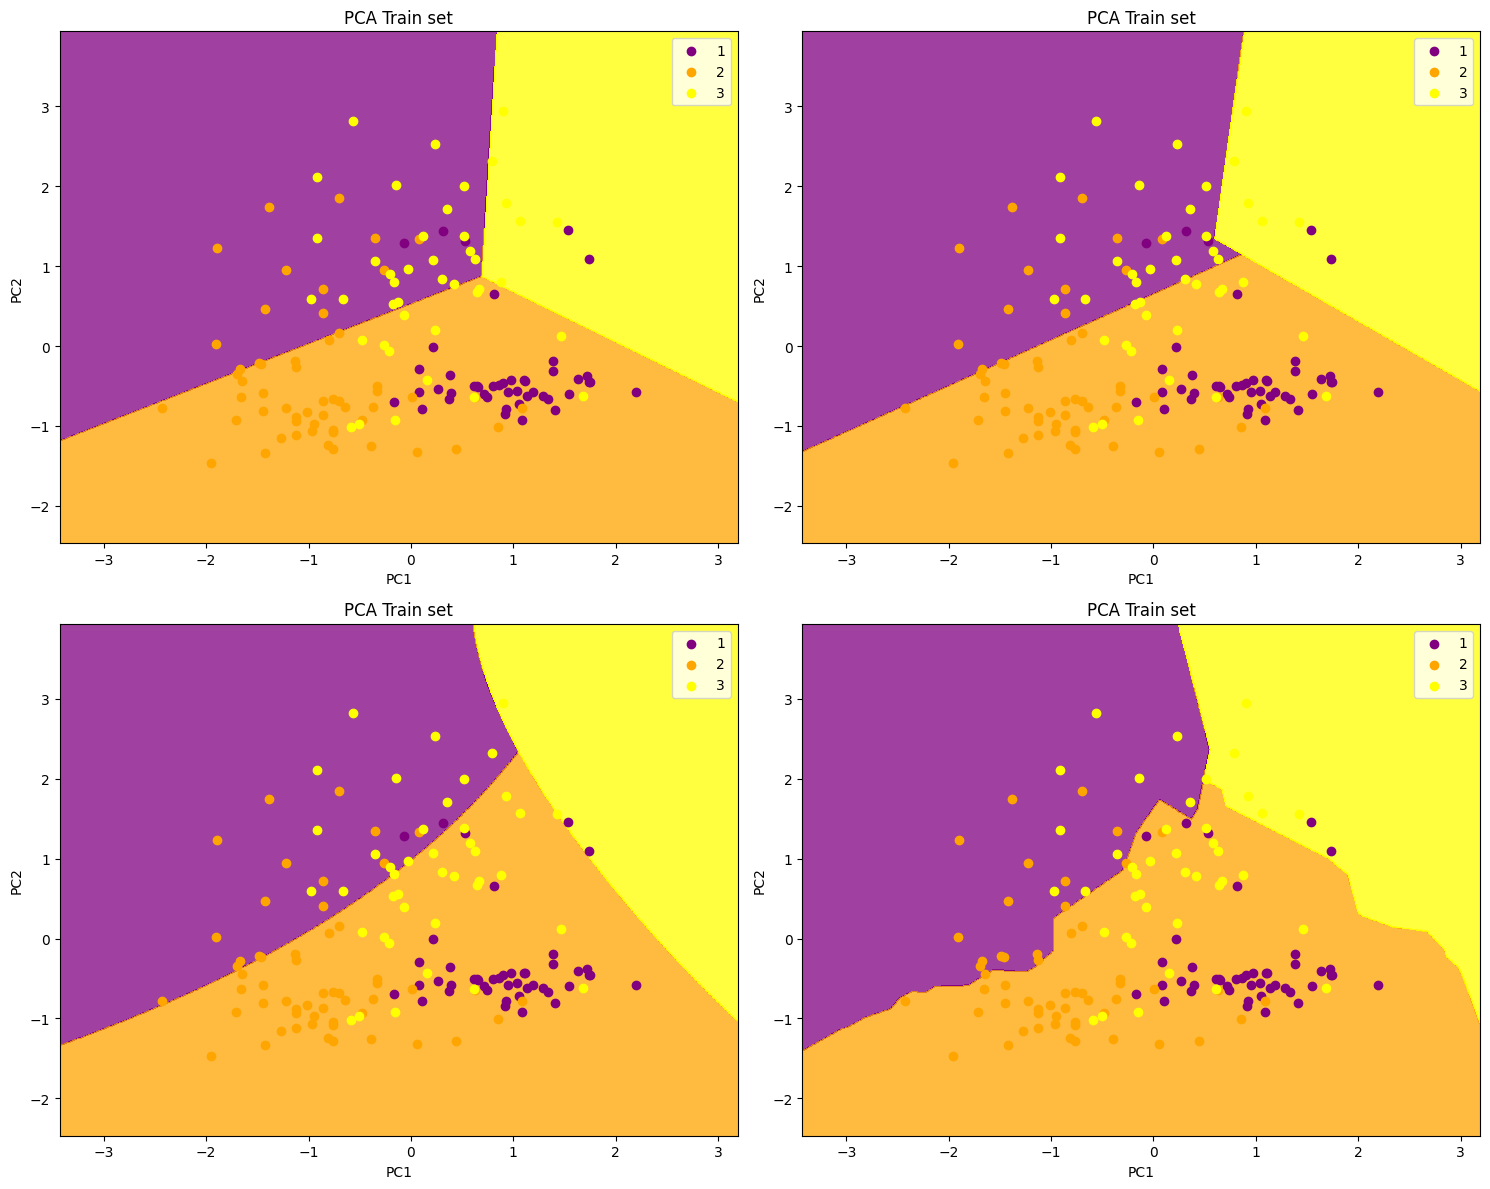

In [19]:
from matplotlib.colors import ListedColormap

# List of classifiers
classifiers = {
    "Logistic Regression": logistic(LDAbest, y_train, X_test_1)[0],
    "SVM Linear": svm_linear(LDAbest, y_train, X_test_1)[0],
    "SVM Non-Linear": svm_NL(LDAbest, y_train, X_test_1)[0],
    "KNN": knn(LDAbest, y_train, X_test_1)[0],
    "Naive Bayes": Navie(LDAbest, y_train, X_test_1)[0],
    "Decision Tree": Decision(LDAbest, y_train, X_test_1)[0],
    "Random Forest": random(LDAbest, y_train, X_test_1)[0]
}

# Create subplots (3 rows, 3 columns)
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

# Loop through classifiers and plot each
# Limit to available subplots
num_plots=min(len(classifiers), len(axes))
for idx, (name, classifier) in enumerate(list(classifiers.items())[:num_plots]):
    ax = axes[idx]
    X_set, y_set = X_train, y_train
    
    # Create mesh grid
    X1, X2 = np.meshgrid(
        np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
        np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
    )
    
    # Plot decision boundary
    ax.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                alpha=0.75, cmap=ListedColormap(('purple', 'orange', 'yellow')))
    
    # Plot scatter points for training data
    for i, j in enumerate(np.unique(y_set)):
        ax.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                   c=ListedColormap(('purple', 'orange', 'yellow'))(i), label=j)
    
    ax.set_title("PCA Train set")  # Set title to classifier name
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.legend()
# Remove empty subplots if there are any
for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])
# Adjust layout
plt.tight_layout()
plt.show()

C:\Users\Bagirathan\AppData\Local\Temp\ipykernel_14676\3859623006.py:37: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
C:\Users\Bagirathan\AppData\Local\Temp\ipykernel_14676\3859623006.py:37: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
C:\Users\Bagirathan\AppData\Local\Temp\ipykernel_14676\3859623006.py:37: UserWar

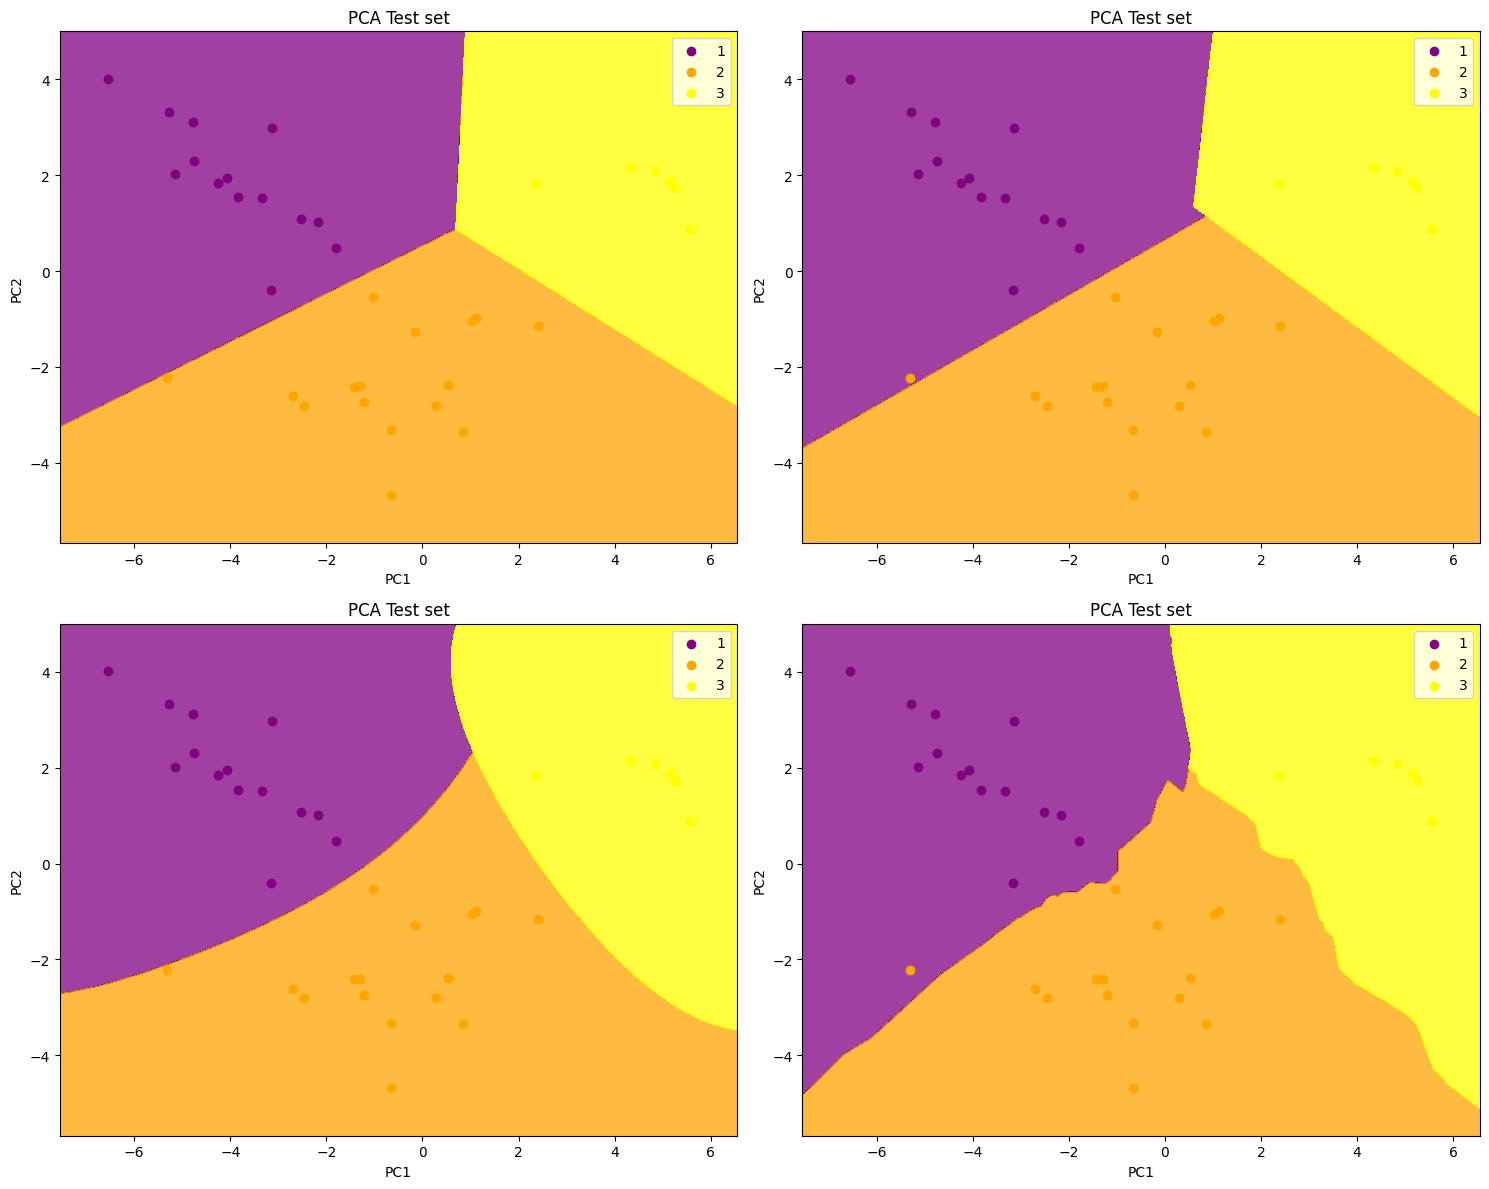

In [20]:
from matplotlib.colors import ListedColormap

# List of classifiers
classifiers = {
    "Logistic Regression": logistic(LDAbest, y_train, X_test_1)[0],
    "SVM Linear": svm_linear(LDAbest, y_train, X_test_1)[0],
    "SVM Non-Linear": svm_NL(LDAbest, y_train, X_test_1)[0],
    "KNN": knn(LDAbest, y_train, X_test_1)[0],
    "Naive Bayes": Navie(LDAbest, y_train, X_test_1)[0],
    "Decision Tree": Decision(LDAbest, y_train, X_test_1)[0],
    "Random Forest": random(LDAbest, y_train, X_test_1)[0]
}

# Create subplots (3 rows, 3 columns)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

# Loop through classifiers and plot each
num_plots = min(len(classifiers), len(axes)) ## Limit to available subplots
for idx, (name, classifier) in enumerate(list(classifiers.items())[:num_plots]):
    ax = axes[idx]
    X_set, y_set = X_test, y_test
    
    # Create mesh grid
    X1, X2 = np.meshgrid(
        np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
        np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
    )
    
    # Plot decision boundary
    ax.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                alpha=0.75, cmap=ListedColormap(('purple', 'orange', 'yellow')))
    
    # Plot scatter points for training data
    for i, j in enumerate(np.unique(y_set)):
        ax.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                   c=ListedColormap(('purple', 'orange', 'yellow'))(i), label=j)
    
    ax.set_title("PCA Test set")  # Set title to classifier name
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.legend()
# Remove empty subplots if there are any
for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])
# Adjust layout
plt.tight_layout()
plt.show()